In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
# writing data to a table and simplifying labeling
df = pd.read_csv("jewelry.csv")
df["Variant"] = df["Variant"].map({90:'A', 10:'B'})

# splitting the table into two by different test options
df_a = df[df["Variant"]=="A"]
df_b = df[df["Variant"]=="B"]
del df_a["Variant"], df_b["Variant"]

# merge into a single shared folder with indexing by date
df = df_a.merge(df_b, on="date")
df.index = df_a.date
del df["date"]
df.columns = ['cnt(A)', 'sum(A)', 'cnt(B)', 'sum(B)']
df.head()

,cnt(A),sum(A),cnt(B),sum(B)
date,,,,
2019-09-01,56,110247,52,163098
2019-09-02,56,26457,59,93317
2019-09-03,54,56418,46,16985
2019-09-04,59,27379,46,31152
2019-09-05,49,17503,82,32306


At this stage, the question arises: what metric should I choose for an objective assessment of the test quality? It is clear that just taking the metrics of the number of added products and their amount is not enough - we will answer why. As for the amount of goods, it does not carry anything informative without reference to the number of goods, because they can vary greatly in prices. The same applies to units of goods - you can buy a couple of products for a price many times higher than the other ten products. Thus, it becomes obvious that it is necessary to link both indicators. Let's take a criterion that represents the ratio of the amount of goods to their quantity.

In [5]:
df["rat_A"] = df["sum(A)"] / df["cnt(A)"]
df["rat_B"] = df["sum(B)"] / df["cnt(B)"]
column_names = ['rat_A', 'rat_B']
df = df.reindex(columns=column_names)
df.head(4)

,rat_A,rat_B
date,,
2019-09-01,1968.696429,3136.500000
2019-09-02,472.446429,1581.644068
2019-09-03,1044.777778,369.239130
2019-09-04,464.050847,677.217391


Find the average values for the control and test groups.

In [9]:
print(f"The average cost per product addition is:\n\
in the control sample:\n\
\t{np.mean(df.rat_A)};\n\
in the test sample:\n\
\t{np.mean(df.rat_B)}")

diff_mean = np.mean(df.rat_B)-np.mean(df.rat_A)
print(f"\nThe difference is: {diff_mean}.")

The average cost per product addition is:
in the control sample:
	729.02142530739;
in the test sample:
	814.605073329606

The difference is: 85.58364802221593.


We see that the average metric value for group B is 86 units higher than the average for A. Let's find out if this is an accident, or if the difference between site designs is so significant.

**For the null hypothesis, we assume that the difference is random, while the alternative hypothesis is that it is, on the contrary, statistically significant.**

Let's estimate the type of distribution that corresponds to our sample.

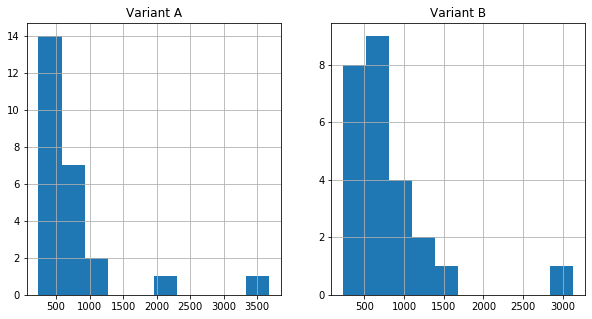

In [287]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Variant А')
df.rat_A.hist()

plt.subplot(1, 2, 2)
plt.title('Variant B')
df.rat_B.hist()

plt.show()

Obviously, the distribution is not normal. In this case, we will use a bootstrap that does not depend on the type of SV distribution.

In [11]:
N = 1500
diff = []
for i in range(N):
    a = np.random.choice(df.rat_A, size=25)
    b = np.random.choice(df.rat_B, size=25)
    diff.append(np.mean(b)-np.mean(a))

diff = np.array(diff)
p_value = len(diff[diff>diff_mean])/len(diff)
print(f"p_value = : {p_value}.")

p_value = : 0.49733333333333335.


As we can see, the p_value criterion is greater than the threshold value of 0.05, so there is no reason to reject the null hypothesis.
Nevertheless, we will not rush - perhaps after centering we will get a different result.

In [13]:
diff = diff - np.mean(diff)
p_value_new = len(diff[diff>diff_mean])/len(diff)
print(f"After centering p_value = {p_value_new}.")

After centering p_value = 0.32.


The p_value value has changed, but not by much - it is still too large to claim that the difference is statistically significant. Therefore, there is no difference as such between the two types of ring size selection, which, by the way, is a rather unexpected result.